In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
# print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
# print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.8.0


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers

In [3]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

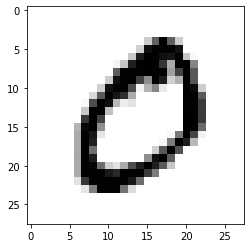

In [6]:
plt.imshow(X_train[1])

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
X_train = X_train.reshape(len(X_train),28*28)
X_train = X_train.astype('float32')/255
X_test = X_test.reshape(len(X_test),28*28)
X_test = X_test.astype('float32')/255


In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
model = models.Sequential([
    layers.Dense(512,activation="relu",input_shape = (784,)),
    layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

Metal device set to: Apple M1


2022-05-10 17:30:08.286691: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 17:30:08.286813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.fit(X_train,y_train,epochs=5,batch_size = 128)

Epoch 1/5


2022-05-10 17:30:08.404324: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-10 17:30:08.561559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 7ms/step - loss: 0.2569 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1048 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0687 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0374 - accuracy: 0.9886


In [12]:
test_loss , test_acc = model.evaluate(X_test,y_test)

 31/313 [=>............................] - ETA: 1s - loss: 0.0721 - accuracy: 0.9708

2022-05-10 17:30:24.443670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0776 - accuracy: 0.9743


In [13]:
test_loss

0.07760325074195862

In [14]:
test_acc


0.9743000268936157

In [15]:
X = model.predict(X_test)

2022-05-10 17:30:26.112089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [20]:
np.sum(X[0])

1.0000001

In [17]:
np.argmax(X[0])

7

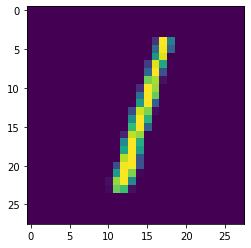

In [18]:
plt.imshow(X_test[2].reshape(28,28))